In [1]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data=pd.read_csv('C:/Users/HP/OneDrive/Desktop/Assignments/Data Set/Company_Data.csv')

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df=data.copy()

In [7]:
df.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes


In [8]:
df.insert(11,'Sales_class'," ")

for i in range(0,len(df['Sales']),1):
    if df['Sales'].iloc[i]<=7.5:
        df['Sales_class'].iloc[i]='Low'
    else:
        df['Sales_class'].iloc[i]='high'

C:\Users\HP\AppData\Local\Temp\ipykernel_10888\3573780014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='high'
C:\Users\HP\AppData\Local\Temp\ipykernel_10888\3573780014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_class'].iloc[i]='Low'


In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [10]:
df.drop(['Sales'],axis=1,inplace=True)

In [11]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,Bad,42,17,Yes,Yes,high
1,111,48,16,260,83,Good,65,10,Yes,Yes,high
2,113,35,10,269,80,Medium,59,12,Yes,Yes,high
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [12]:
#Complete dataset
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc'])
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['US']= label_encoder.fit_transform(df['US'])
df['Sales_class']= label_encoder.fit_transform(df['Sales_class'])

In [13]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


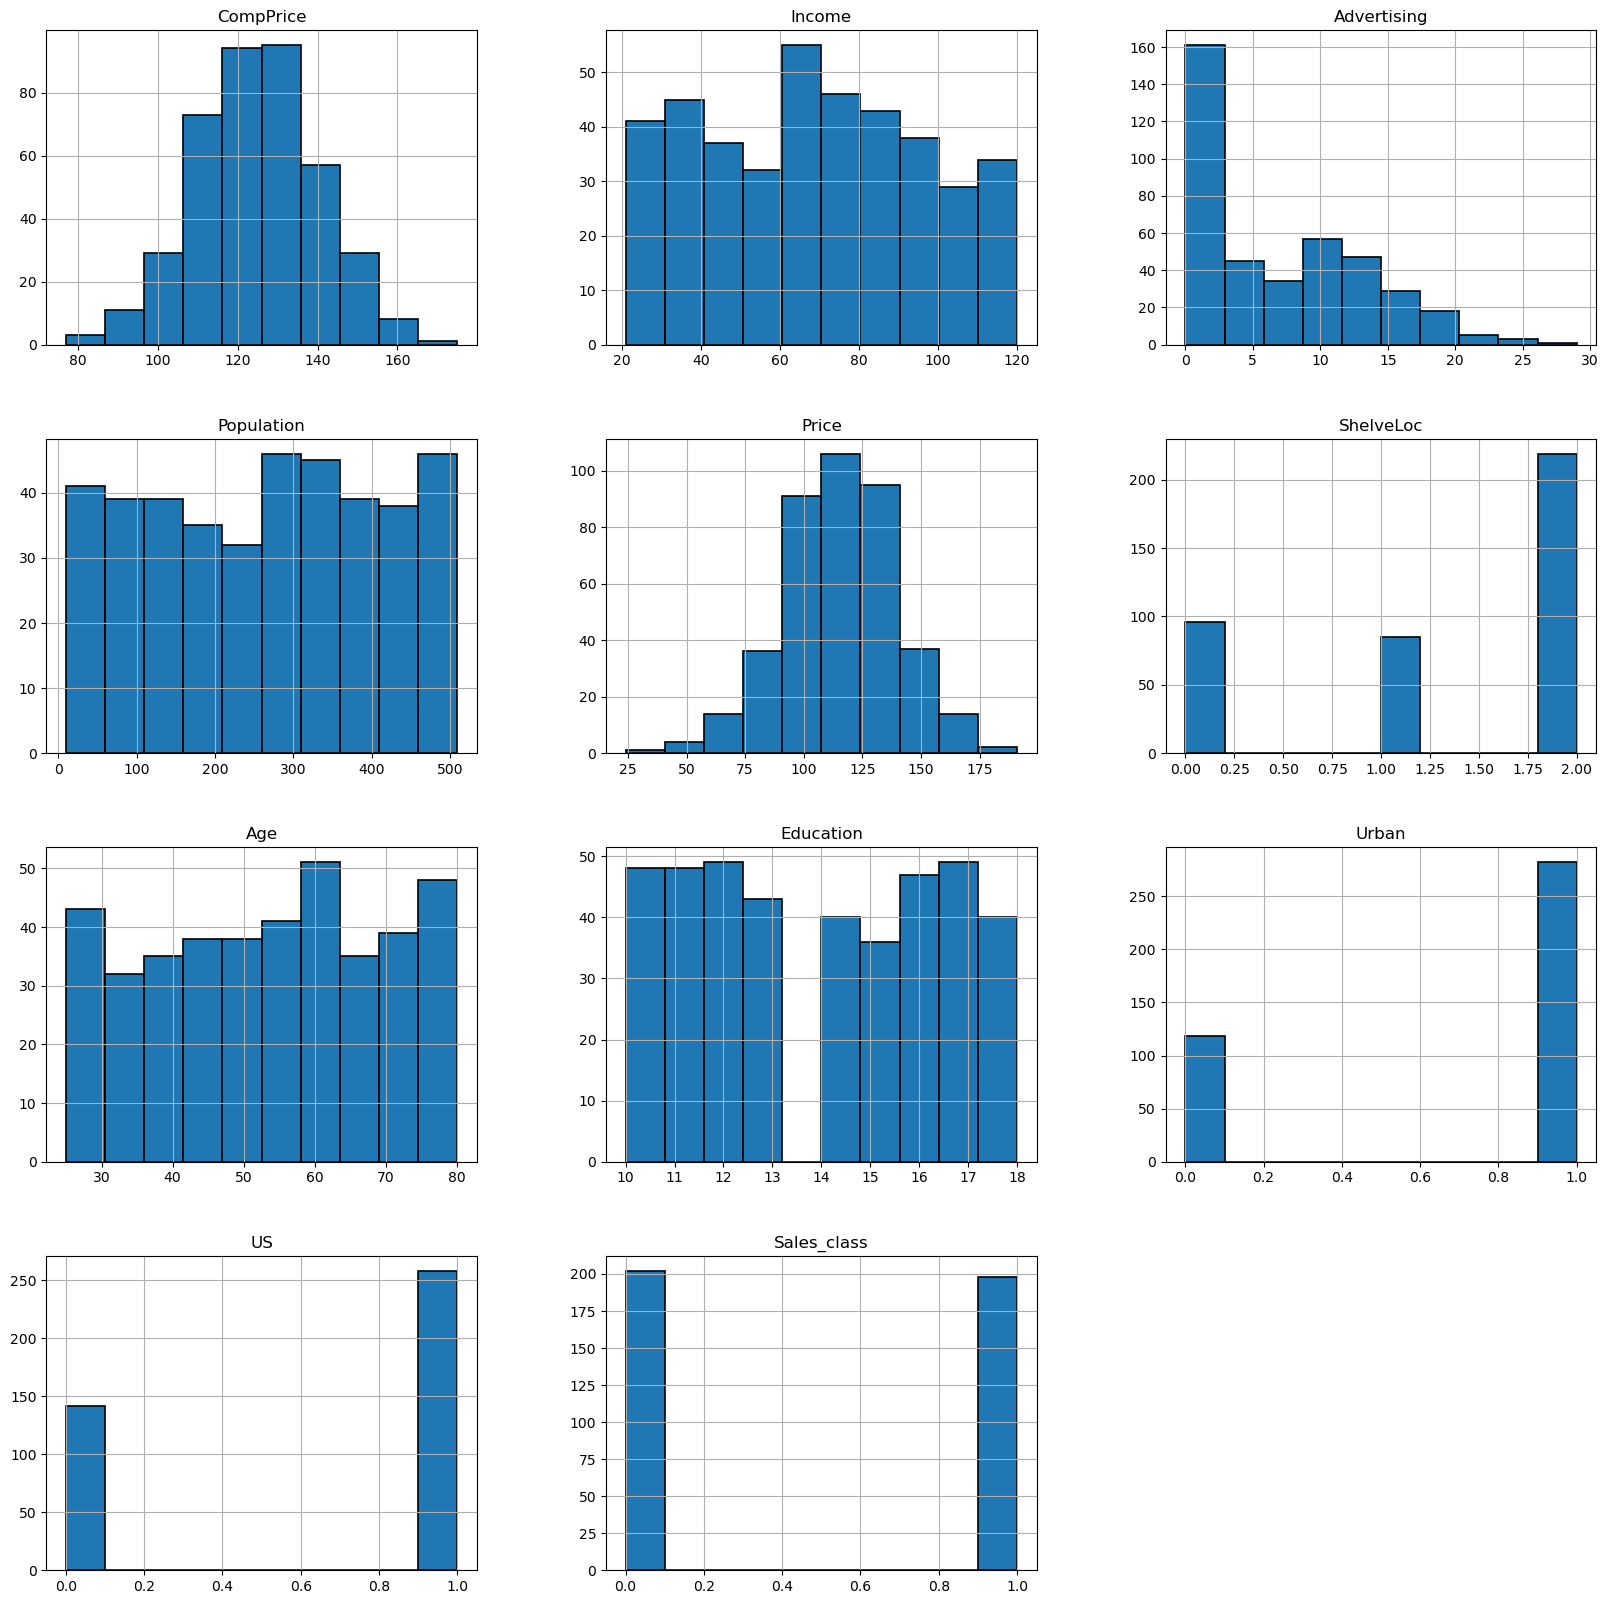

In [14]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

<Axes: >

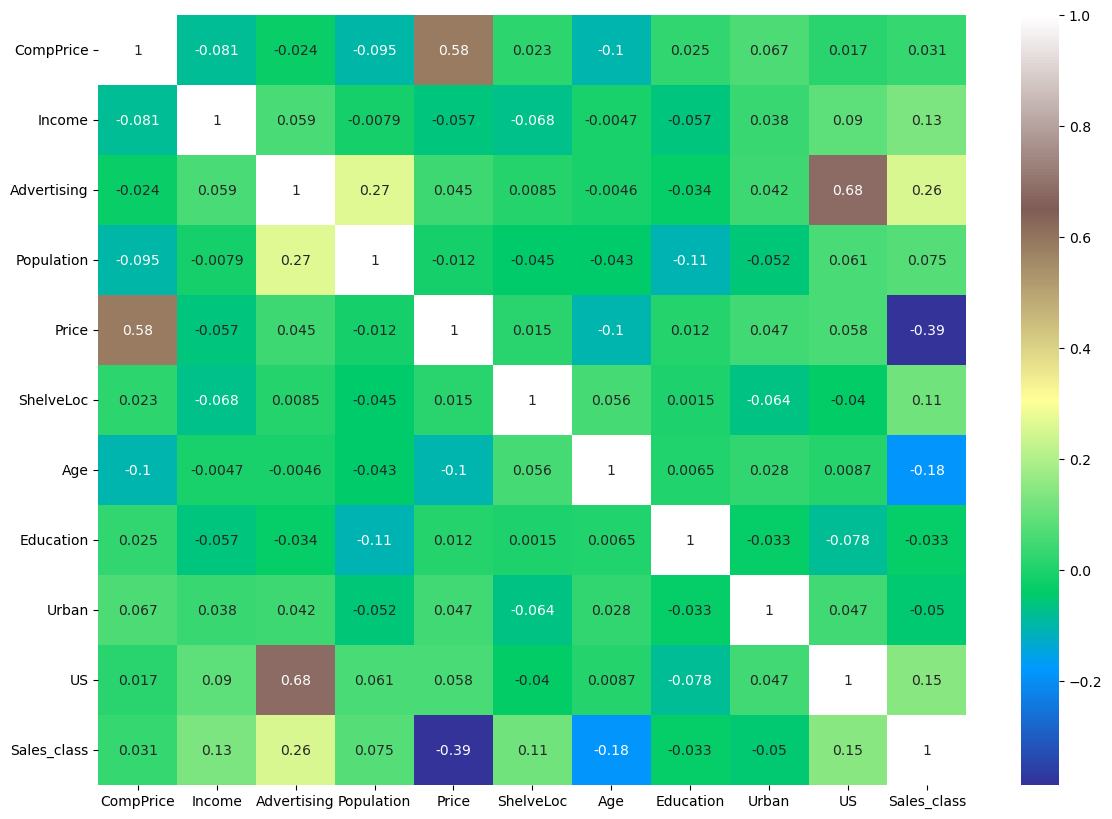

In [15]:
plt.figure(figsize=(14,10))
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='terrain')

In [16]:
pdata=df.copy()
wd=df.copy()

In [17]:
x=pdata.iloc[:,0:-1]
y=pdata['Sales_class']

In [18]:
y.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [19]:
import warnings

In [20]:
lr=LogisticRegression()

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
m = [100,150,200,400,500,1000]
param_grid = ({'max_iter':m,'penalty':['l1','l2']})
lr=LogisticRegression(solver='liblinear')
grid=GridSearchCV(lr,param_grid)
grid.fit(x,y)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'max_iter': [100, 150, 200, 400, 500, 1000],
                         'penalty': ['l1', 'l2']})

In [23]:
param_grid

{'max_iter': [100, 150, 200, 400, 500, 1000], 'penalty': ['l1', 'l2']}

In [24]:
grid.best_score_

0.7949999999999999

In [25]:
grid.best_params_

{'max_iter': 100, 'penalty': 'l1'}

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [27]:
X=pdata.iloc[:,0:-1]
Y=pdata['Sales_class']

In [28]:
lr2=LogisticRegression(max_iter=1000)
lr2.fit(x_train,y_train)
acc = lr2.score(x_test,y_test)*100
print(acc)

78.75


In [29]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_score=roc_auc_score(y_test,lr2.predict(x_test))
logit_roc_score

0.785355122564425

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=12, random_state=0, shuffle=True)
results = cross_val_score(lr2, x,y, cv=kfold)
print("Using KFold cross validation result is : ",results.mean()*100.0)

Using KFold cross validation result is :  79.30778371954842


In [31]:
results.std()*100.0

7.719858519078455

In [32]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

1.0
0.675


In [ ]:
m=list(range(2,20))
param_grid = ({'max_depth':m,'criterion':['gini','entropy'],'max_leaf_nodes':m,'min_samples_leaf':m})
dt2_model = DecisionTreeClassifier()
grid=GridSearchCV(dt2_model,param_grid)
grid.fit(x,y)

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

In [35]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]})

In [36]:
print(grid.best_score_)
print(grid.best_params_)

0.74375
{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 19, 'min_samples_leaf': 4}


In [37]:
grid.score(x_test, y_test)

0.725

In [38]:
grid.best_score_

0.74375

In [39]:
final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
final_model.fit(x_train, y_train)
print(final_model.score(x_train, y_train))
print(final_model.score(x_test, y_test))

0.88125
0.725


In [40]:
kfold = KFold(n_splits=12, shuffle=True, random_state=0)
results = cross_val_score(final_model, x,y, cv=kfold)
print("Using KFold cross validation result is : ",results.mean()*100.0)

Using KFold cross validation result is :  76.01010101010101


In [41]:
#Decision tree in the form of function
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [42]:
X=wd.iloc[:,0:-1]
Y=wd['Sales_class']

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result: ")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result: ")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

In [44]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

Train Result: 
Accuracy Score: 100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    165.0  155.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[165   0]
 [  0 155]]

Test Result: 
Accuracy Score: 71.25%
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.694444   0.727273    0.7125   0.710859      0.712090
recall      0.675676   0.744186    0.7125   0.709931      0.712500
f1-score    0.684932   0.735632    0.7125   0.710282      0.712183
support    37.000000  43.000000    0.7125  80.000000     80.000000
Confusion Matrix: 
 [[25 12]
 [11 32]]



In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE

In [46]:
RFE.predict

<function sklearn.feature_selection._rfe.RFE.predict(self, X)>

In [47]:
final_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
a = [2,3,4,5,6,7,8,9,10,11,12]
parameter = ({'n_features_to_select':a})
rfe = RFE(final_model)

In [48]:
gridRFE = GridSearchCV(rfe,parameter)
gridRFE.fit(x_train,y_train)
gridRFE.best_params_

{'n_features_to_select': 6}

In [51]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0


In [52]:
rfe2_data=df.copy()
rfe2_data.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_class
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1


In [53]:
rfe2_data.drop(['Population','Urban','US','Education'],axis=1,inplace=True)

In [54]:
rfe2_data.head(5)

,CompPrice,Income,Advertising,Price,ShelveLoc,Age,Sales_class
0,138,73,11,120,0,42,1
1,111,48,16,83,1,65,1
2,113,35,10,80,2,59,1
3,117,100,4,97,2,55,0
4,141,64,3,128,0,38,0


In [55]:
rfe2_data.Sales_class.value_counts()

0    202
1    198
Name: Sales_class, dtype: int64

In [56]:
x1=rfe2_data.iloc[:,0:-1]
y1=rfe2_data.iloc[:,-1]

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.2,random_state=42)

In [58]:
f_model=DecisionTreeClassifier(max_depth=8,criterion='entropy',max_leaf_nodes=19,min_samples_leaf=4)
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

0.871875
0.75


In [59]:
f_model=DecisionTreeClassifier()
f_model.fit(x_train, y_train)
print(f_model.score(x_train, y_train))
print(f_model.score(x_test, y_test))

1.0
0.7625


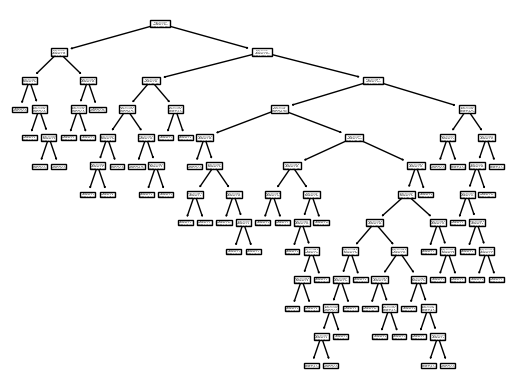

In [60]:
#PLot the decision tree
tree.plot_tree(f_model);

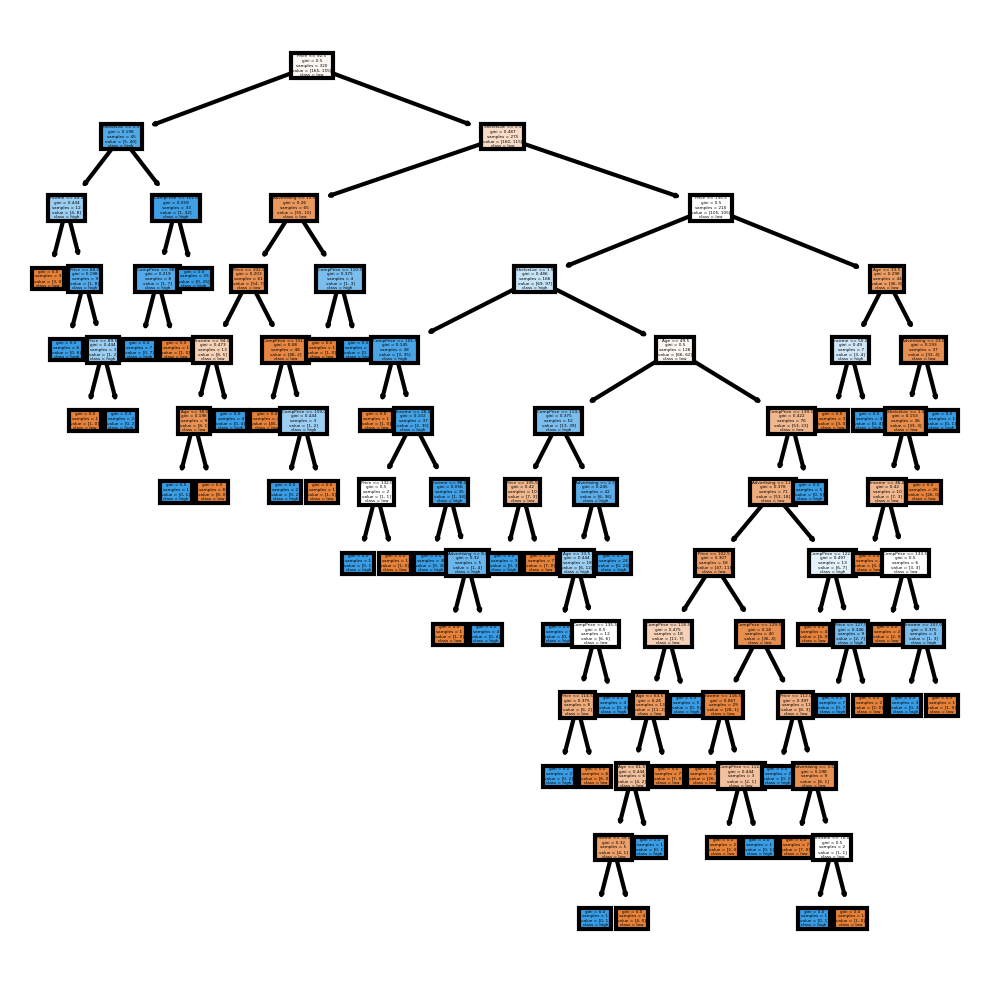

In [61]:
fn=['CompPrice', 'Income', 'Advertising', 'Price', 'ShelveLoc', 'Age']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(f_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [62]:
#Predicting on test data
preds = f_model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 


1    44
0    36
dtype: int64

In [63]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Sales_class,,
0,27,10
1,9,34


In [64]:
# Accuracy 
np.mean(preds==y_test)

0.7625

Outcomes

=> Using the Decision Tree Classifier and applying RFE(Recursive Feature Elimination) the accuracy of 75% is obtained.

=> So, as per the dataset we get to know that 6 attributes contributes to the high sale.